<a href="https://colab.research.google.com/github/pra1608/quality-Prediction-in-mining/blob/main/LSTM_Project6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [138]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

In [139]:
df = pd.read_pickle('/content/drive/My Drive/Colab Notebooks/cleaned.pkl')



In [140]:
df = df.set_index(['datetime'])

In [141]:
X_train, X_test, y_train, y_test = train_test_split(df[df.columns.values[:-1]], df[df.columns.values[-1]], test_size=0.1, random_state=42)

##Data Preprocessing
Here we are picking 708480 data points for training. Observation is recorded every ~20 sec, that means 3 times per minute. 

We are tracking data from past 60 timestamps (60/3=20 minute). This data will be used to predict the temperature after 3 timestamps (3/3=1 minute).

Since every feature has values with varying ranges, we do normalization to confine feature values to a range of [0, 1] before training a neural network. We do this by subtracting the mean and dividing by the standard deviation of each feature.

80 % of the data will be used to train the model, i.e. 566784 rows. split_fraction can be changed to alter this percentage.


In [144]:
X_train.columns

Index(['date', 'year', 'month', 'day', 'hour', 'minute', 'second',
       '% Iron Feed', '% Silica Feed', 'Starch Flow', 'Amina Flow',
       'Ore Pulp Flow', 'Ore Pulp pH', 'Ore Pulp Density',
       'Flotation Column 01 Air Flow', 'Flotation Column 02 Air Flow',
       'Flotation Column 03 Air Flow', 'Flotation Column 04 Air Flow',
       'Flotation Column 05 Air Flow', 'Flotation Column 06 Air Flow',
       'Flotation Column 07 Air Flow', 'Flotation Column 01 Level',
       'Flotation Column 02 Level', 'Flotation Column 03 Level',
       'Flotation Column 04 Level', 'Flotation Column 05 Level',
       'Flotation Column 06 Level', 'Flotation Column 07 Level',
       '% Iron Concentrate'],
      dtype='object')

In [145]:
selected_feature = X_train.columns[7:].tolist()

In [146]:
selected_feature

['% Iron Feed',
 '% Silica Feed',
 'Starch Flow',
 'Amina Flow',
 'Ore Pulp Flow',
 'Ore Pulp pH',
 'Ore Pulp Density',
 'Flotation Column 01 Air Flow',
 'Flotation Column 02 Air Flow',
 'Flotation Column 03 Air Flow',
 'Flotation Column 04 Air Flow',
 'Flotation Column 05 Air Flow',
 'Flotation Column 06 Air Flow',
 'Flotation Column 07 Air Flow',
 'Flotation Column 01 Level',
 'Flotation Column 02 Level',
 'Flotation Column 03 Level',
 'Flotation Column 04 Level',
 'Flotation Column 05 Level',
 'Flotation Column 06 Level',
 'Flotation Column 07 Level',
 '% Iron Concentrate']

In [149]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train[selected_feature])
X_test = scaler.fit_transform(X_test[selected_feature])
y_train = scaler.fit_transform(y_train.values.reshape(-1,1))
y_test = scaler.fit_transform(y_test.values.reshape(-1,1))

In [150]:
import numpy as np
np.concatenate((X_train,y_train),axis = 1)
features = pd.DataFrame(np.concatenate((X_train,y_train),axis = 1))
features.head()
ft = pd.DataFrame(np.concatenate((X_test,y_test),axis = 1))



In [151]:
X1 = features[features.columns.tolist()[0:21]]
Y1 = features[features.columns.tolist()[22]]
X2 = features[ft.columns.tolist()[0:21]]
Y2 = features[ft.columns.tolist()[22]]


In [153]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
pd.pandas.set_option('display.max_columns', None)
feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(X1, Y1)

SelectFromModel(estimator=Lasso(alpha=0.005, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=0,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [154]:
selected_feat = X1.columns[(feature_sel_model.get_support())]


In [155]:
checklist = selected_feat.tolist()

In [157]:
features = features.loc[:,[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 16, 17, 18, 20,21,22]]
ft = ft.loc[:,[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 16, 17, 18, 20,21,22]]

In [158]:
split_fraction = 0.9
train_split = int(split_fraction * int(X1.shape[0]))
step = 3

past = 60
future = 3
learning_rate = 0.001
batch_size = 256
epochs = 3

In [159]:
train_data = features.loc[0 : train_split - 1]
val_data = features.loc[train_split:]

In [166]:
start = past + future
end = start + train_split

x_train = train_data[checklist].values
y_train = features.iloc[start:end][[22]].values
x_test = ft[checklist]
y_test = ft[[22]].values

sequence_length = int(past / step)

In [164]:
x_test

array([[-1.06499807,  0.77627375,  0.44389032, ...,  0.16632731,
         0.22448651,  0.98514414],
       [-0.80559937,  0.88195148, -0.26036779, ..., -0.89489177,
        -0.92360669, -1.2645634 ],
       [ 0.11374016, -0.21825502,  0.550307  , ...,  0.26651945,
         0.41805592,  0.26345117],
       ...,
       [-0.71595423,  0.86313215,  1.33713576, ..., -0.74680284,
        -1.24059541, -1.71365815],
       [-0.25437712,  0.15668377, -0.23794823, ..., -1.11946267,
        -0.89343833, -0.88564269],
       [ 0.70692396, -0.70321447,  0.99613403, ...,  0.0170307 ,
        -0.26526296, -0.14125408]])

In [167]:
dataset_train = keras.preprocessing.timeseries_dataset_from_array(
    x_train,
    y_train,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)

#Validation dataset


In [187]:
x_end = len(val_data) - past - future

label_start = train_split + past + future

x_val = val_data.iloc[:x_end][checklist].values
y_val = features.iloc[label_start:][[22]].values

dataset_val = keras.preprocessing.timeseries_dataset_from_array(
    x_val,
    y_val,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)


for batch in dataset_train.take(1):
    inputs, targets = batch

print("Input shape:", inputs.numpy().shape)
print("Target shape:", targets.numpy().shape)

Input shape: (256, 20, 17)
Target shape: (256, 1)


In [171]:
y_val

array([[-0.21702031],
       [-0.92201365],
       [-0.39549964],
       ...,
       [ 0.37196147],
       [-0.66321862],
       [ 0.56828873]])

#Training


In [172]:
inputs = keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2]))
lstm_out = keras.layers.LSTM(32)(inputs)
outputs = keras.layers.Dense(1)(lstm_out)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss="mse")
model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 20, 17)]          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                6400      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 6,433
Trainable params: 6,433
Non-trainable params: 0
_________________________________________________________________


In [173]:
path_checkpoint = "model_checkpoint.h5"
es_callback = keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=5)

modelckpt_callback = keras.callbacks.ModelCheckpoint(
    monitor="val_loss",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
)

history = model.fit(
    dataset_train,
    epochs=epochs,
    validation_data=dataset_val,
    callbacks=[es_callback, modelckpt_callback],
)

Epoch 1/3
2242/2242 [==============================] - ETA: 0s - loss: 1.0005
Epoch 00001: val_loss improved from inf to 1.01288, saving model to model_checkpoint.h5
2242/2242 [==============================] - 115s 51ms/step - loss: 1.0005 - val_loss: 1.0129
Epoch 2/3
2241/2242 [============================>.] - ETA: 0s - loss: 0.9991
Epoch 00002: val_loss improved from 1.01288 to 1.01277, saving model to model_checkpoint.h5
2242/2242 [==============================] - 115s 51ms/step - loss: 0.9990 - val_loss: 1.0128
Epoch 3/3
2242/2242 [==============================] - ETA: 0s - loss: 0.9987
Epoch 00003: val_loss did not improve from 1.01277
2242/2242 [==============================] - 116s 52ms/step - loss: 0.9987 - val_loss: 1.0128


We can visualize the loss with the function below. After one point, the loss stops decreasing.

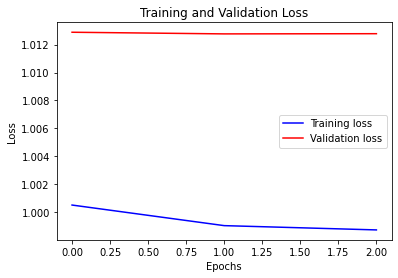

In [174]:
def visualize_loss(history, title):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    epochs = range(len(loss))
    plt.figure()
    plt.plot(epochs, loss, "b", label="Training loss")
    plt.plot(epochs, val_loss, "r", label="Validation loss")
    plt.title(title)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()


visualize_loss(history, "Training and Validation Loss")

#Prediction
The trained model above is now able to make predictions for 5 sets of values from validation set.

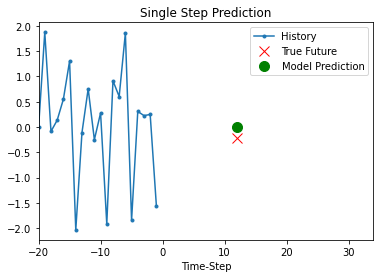

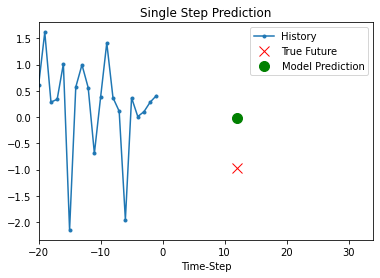

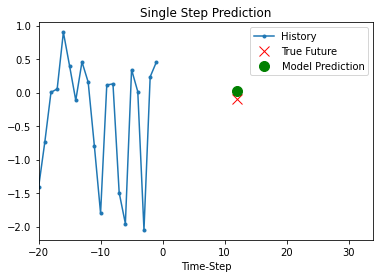

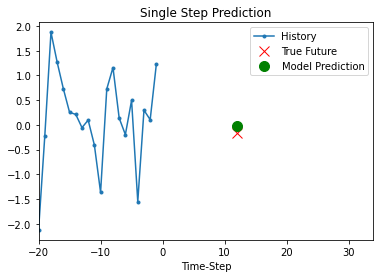

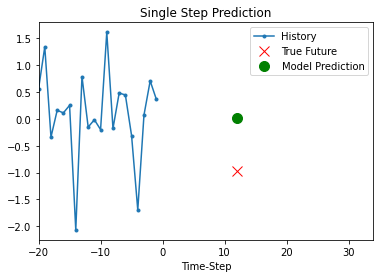

In [175]:
def show_plot(plot_data, delta, title):
    labels = ["History", "True Future", "Model Prediction"]
    marker = [".-", "rx", "go"]
    time_steps = list(range(-(plot_data[0].shape[0]), 0))
    if delta:
        future = delta
    else:
        future = 0

    plt.title(title)
    for i, val in enumerate(plot_data):
        if i:
            plt.plot(future, plot_data[i], marker[i], markersize=10, label=labels[i])
        else:
            plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
    plt.legend()
    plt.xlim([time_steps[0], (future + 5) * 2])
    plt.xlabel("Time-Step")
    plt.show()
    return


for x, y in dataset_val.take(5):
    show_plot(
        [x[0][:, 4].numpy(), y[0].numpy(), model.predict(x)[0]],
        12,
        "Single Step Prediction",
    )

In [181]:
ft

,0,1,2,3,4,5,6,7,9,10,11,12,13,16,17,18,20,21,22
0,-1.064998,0.776274,0.443890,-0.019957,-0.211196,0.772010,0.561226,0.636061,0.571533,0.194373,-0.313985,0.420416,0.041306,-0.230966,0.166327,0.224487,0.985144,0.365714,-0.778353
1,-0.805599,0.881951,-0.260368,0.743626,0.622951,-0.182482,1.147556,0.513645,0.544514,0.410612,-0.077475,0.027239,0.256228,1.316804,-0.894892,-0.923607,-1.264563,-0.292229,0.424689
2,0.113740,-0.218255,0.550307,0.775084,0.739202,0.552938,0.433166,-1.065617,-1.161621,-0.232064,-2.609983,-1.546014,-1.547954,0.142775,0.266519,0.418056,0.263451,1.104773,-0.715973
3,0.043168,-0.190750,-0.585802,-0.943674,-0.139814,0.060486,0.617087,-1.099062,-1.124266,-1.848114,1.961737,-1.481337,-1.540257,0.406257,0.326980,0.326560,0.286481,1.230954,-1.108076
4,-0.340208,0.370935,-0.494219,0.867089,0.141022,-0.396329,1.482144,-1.100260,-1.157558,-1.848114,1.961737,-1.533946,-1.537752,2.322742,-2.471852,-0.511421,-0.226789,-2.680651,1.730210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70843,-1.042110,1.204775,0.302719,2.530875,0.750878,-0.799844,0.766441,0.644483,0.709121,0.154133,-0.529311,-0.054251,0.436822,-0.929608,-0.271646,-0.258613,-0.192108,1.086747,-0.992227
70844,0.247254,-0.585956,1.647176,1.265054,-0.021117,1.930341,0.781318,-1.136479,0.604254,-0.060481,-0.119844,0.084017,0.346901,-0.719044,-0.621161,-0.911573,-0.969448,0.942541,0.576183
70845,-0.715954,0.863132,1.337136,0.645410,-1.584480,-0.989382,0.590542,0.646194,0.712080,-0.810226,-0.587161,1.856587,1.565200,-1.220187,-0.746803,-1.240595,-1.713658,-1.373778,1.271274
70846,-0.254377,0.156684,-0.237948,0.934724,-1.593658,-2.627242,0.792257,0.579303,0.638366,0.276062,1.225054,2.415388,1.878169,-0.596069,-1.119463,-0.893438,-0.885643,-1.572063,2.046568


In [182]:
x_end = len(ft) - past - future

label_start = past + future

x_t = ft.iloc[:x_end][checklist].values
y_t = ft[label_start:][[22]].values

dataset_t = keras.preprocessing.timeseries_dataset_from_array(
    x_t,
    y_t,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)


for batch in dataset_t.take(1):
    inputs, targets = batch
print("Input shape:", inputs.numpy().shape)
print("Target shape:", targets.numpy().shape)

Input shape: (256, 20, 17)
Target shape: (256, 1)


In [185]:
len(y_t)

70785

In [186]:
len(model.predict(dataset_t))

70726